![](https://media.giphy.com/media/3o6MbrACMlFCny8zmw/giphy.gif)

Remember the rules of ~Fight~ Code Club:
1. ALWAYS DOCUMENT
2. Cite resources that you use (paste links)
3. Include the names people who you worked with
4. Be neat and organized

# Question 1

Using the dataset "us-cities-top-1k-multi-year.csv":
1. Create a line graph of total population over time for the states: NY, PA, CT, NJ (10 pts)
2. Be sure to include a title of the graph, labels on your axis, and a legend. (5 pts)
3. Specify colors to be used in your code. (5 pts)

# https://python-graph-gallery.com/basic-time-series-with-matplotlib/

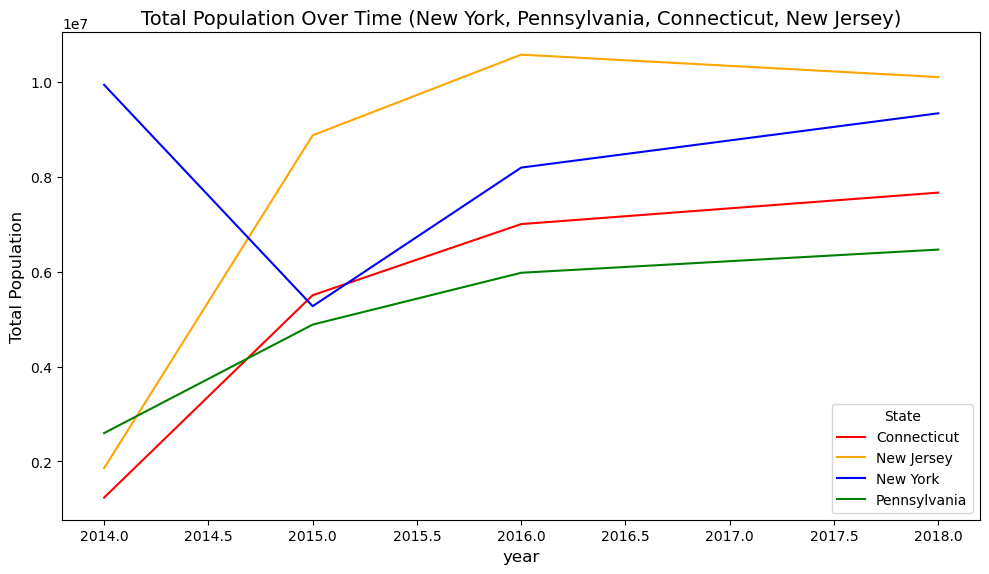

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('us-cities-top-1k-multi-year.csv')
states = ['New York', 'Pennsylvania', 'Connecticut', 'New Jersey'] # Load the dataset into a DataFrame
filtered_df = df[df['State'].isin(states)]
population_data = filtered_df.groupby(['year', 'State'])['Population'].sum().reset_index() # Filter the data for the selected states: New York, Pennsylvania, Connecticut, and New Jersey
colors ={                            # Group the data by year and state, summing the population for each combination
    'New York': 'blue',
    'Pennsylvania': 'green',
    'Connecticut': 'red',        # Define a custom color palette for the states
    'New Jersey': 'orange' # Group the data by year and state, summing the population for each combination
}
plt.figure(figsize=(10, 6))  # Create a line plot for population over time, with different colors for each state
sns.lineplot(x='year', y='Population', hue='State', data=population_data, palette=colors)
plt.title('Total Population Over Time (New York, Pennsylvania, Connecticut, New Jersey)', fontsize=14) # Add a title, labels for the axes, and a legend for the states
plt.xlabel('year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.legend(title='State')
plt.tight_layout()    # Adjust layout and display the plot
plt.show()

# Question 2

Using the dataset "us-cities-top-1k-multi-year.csv":
1. Create a Bar Graph of the total population for 5 cities in the state of New York comparing 2014 years and 2018 years (15 pts)
2. Be sure to include a title of the graph, labels on your axis, and a legend. (5 pts)
3. Combine the graph in question 1 and question 2 in one figure.

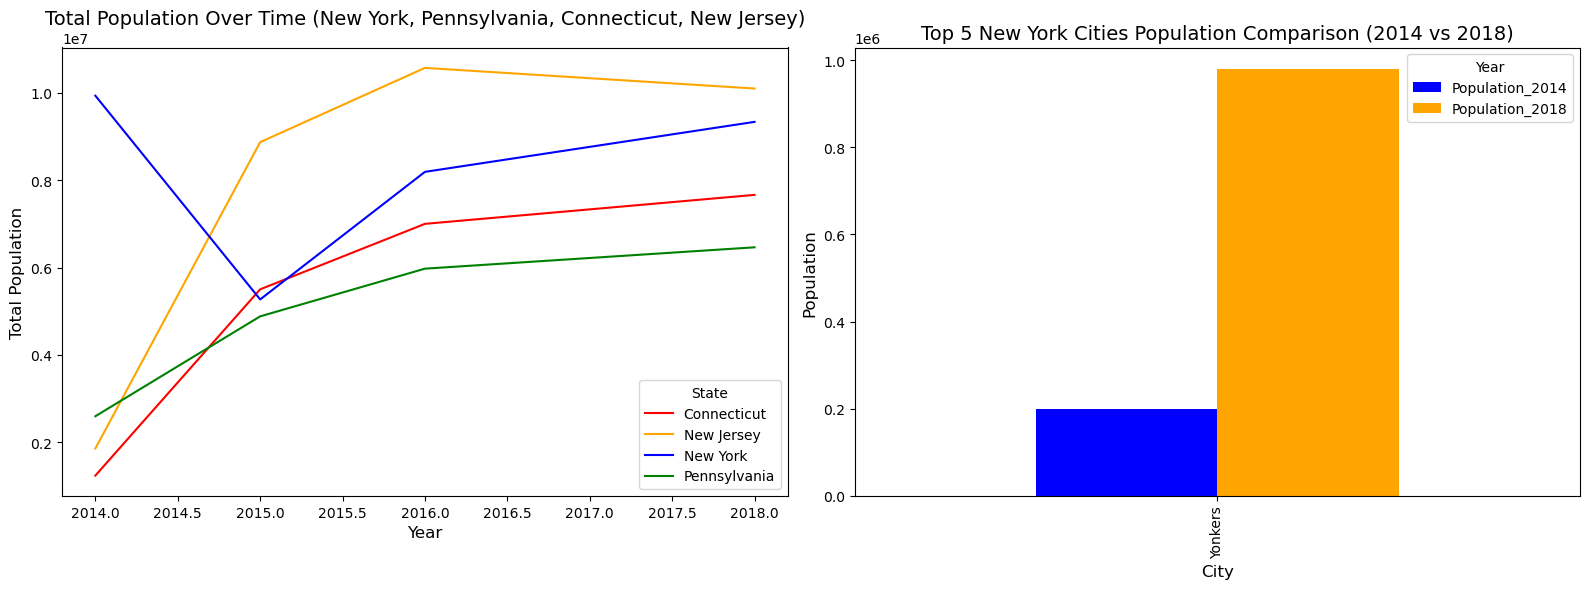

In [13]:
# Now, we'll prepare the data for the bar graph, selecting 5 cities in New York
ny_cities = df[df['State'] == 'New York']
ny_cities_2014 = ny_cities[ny_cities['year'] == 2014][['City', 'Population']].nlargest(5, 'Population')
ny_cities_2018 = ny_cities[ny_cities['year'] == 2018][['City', 'Population']].nlargest(5, 'Population') 
# Merge the 2014 and 2018 data to have them side by side
bar_data = pd.merge(ny_cities_2014[['City', 'Population']], ny_cities_2018[['City', 'Population']], on='City', suffixes=('_2014', '_2018'))
# Plotting both graphs in a single figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# --- First Plot: Line graph for total population over time ---
axes[0].set_title('Total Population Over Time (New York, Pennsylvania, Connecticut, New Jersey)', fontsize=14)
sns.lineplot(x='year', y='Population', hue='State', data=population_data, palette=colors, ax=axes[0])
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Total Population', fontsize=12)
axes[0].legend(title='State')
# --- Second Plot: Bar graph comparing population in 2014 and 2018 for 5 cities in New York ---
bar_data.set_index('City', inplace=True)
bar_data[['Population_2014', 'Population_2018']].plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Top 5 New York Cities Population Comparison (2014 vs 2018)', fontsize=14)
axes[1].set_xlabel('City', fontsize=12)
axes[1].set_ylabel('Population', fontsize=12)
axes[1].legend(title='Year')
# Adjust layout to ensure no overlap between subplots
plt.tight_layout()
# Adjust layout to ensure no overlap between subplots
plt.show()

## Question 3

import the data "job-automation-probability.csv"
1. A Histogram of the variable 'probability'
2. A scatter plot of 'Average annual wage' and 'numbEmployed'
3. Put both of these graphs in one figure
4. Using item 3, change the ticks of Number Employed axes so that it is in logarithmic axis (hint: it's an option) 
5. Adding onto item 4, add a title and axis labels
6. Save your figure as a png

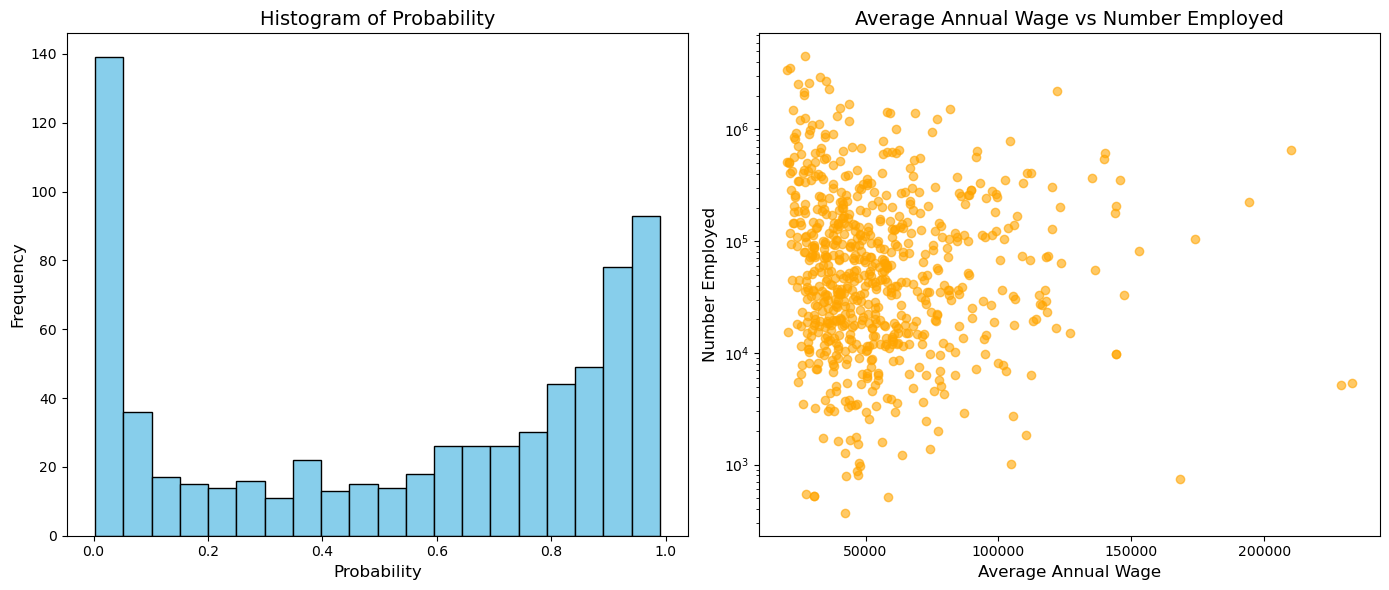

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('job-automation-probability.csv')

# Create the figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Create a histogram of the 'probability' variable
axes[0].hist(df['probability'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Probability', fontsize=14)
axes[0].set_xlabel('Probability', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

#Create a scatter plot of 'Average annual wage' and 'numbEmployed'
scatter = axes[1].scatter(df['Average annual wage'], df['numbEmployed'], color='orange', alpha=0.6)
axes[1].set_title('Average Annual Wage vs Number Employed', fontsize=14)
axes[1].set_xlabel('Average Annual Wage', fontsize=12)
axes[1].set_ylabel('Number Employed', fontsize=12)

#Item 3: Set the 'numbEmployed' axis to a logarithmic scale
axes[1].set_yscale('log')

# Add labels and title for the scatter plot
# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('job_automation_plots.png')

# Show the plots
plt.show()